# Visualització de Dades: PAC2. Estudi de tècniques de visualització de dades.

## Visualització 1. Scatterplot

Aquesta visualització consistirà en un diagrama de dispersió o scatterplot. Aquestes visualitzacions de dades són útils a l'hora de visualitzar tendències. En aquest sentit, aquesta visualització és útil perquè el que cerquem és veure quina va ser la tendència de casos confirmats de Covid-19 durant un cert període de temps a la comarca del Baix Llobregat. També es poden fer servir, per exemple, per cercar correlacions a nivell visual entre dues variables.

El joc de dades amb què es treballarà es pot trobar al link següent: https://analisi.transparenciacatalunya.cat/es/Salut/Dades-di-ries-de-COVID-19-per-comarca/c7sd-zy9j

Aquest notebook, a l'igual que la resta d'entregables de la present PAC, es troba al repositori següent: https://github.com/joangine1/VD.github.io. El joc de dades anterior no perquè pesa massa. Però és accessible a través del link del paràgraf anterior.


A continuació es farà un tractament o un preprocessat del joc de dades a avaluar. Cal dir que es calcularà el nombre total d'infectats totals de la comarca del Baix Llobregat, i per tant agruparem les dades segons les dates i sumarem tots els registres, prescindint així de variables intermitges.

In [96]:
# Importació de llibreries

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [97]:
# Tractament de dades

df = pd.read_csv('Dades_di_ries_de_COVID-19_per_comarca.csv')

# Ens quedem només amb les dades del Baix Llobregat, per simplicitat
df_bl = df[(df.NOM == "BAIX LLOBREGAT")]

# Projectem únicament les variables independent i dependent de l'últim dataframe.

df_bl = df_bl[["DATA", "CASOS_CONFIRMAT"]]


# Convertim la variable "DATA" en objecte datetime de cara a fer les agrupacions

df_bl = df_bl.assign(DATA=pd.to_datetime(pd.Series(df_bl.DATA)))

# Agrupem i sumem segons dates

df_bl = df_bl.groupby(['DATA']).sum()

# Tornem a assignar la data com una columna

df_bl.reset_index(inplace=True)
df_bl = df_bl.rename(columns = {'index':'DATA'})

# Hi ha gran part de la sèrie on, donat un mes, no hi ha tots els dies. Eliminem
# els mesos afectats. Prenem les dades entre les dates 2020-03-03 i 2022-07-27

data_serie = pd.date_range(start="2020-03-03", end="2022/07/27")
df_bl = df_bl[(df_bl["DATA"].isin(data_serie))]

# Ordenem segons dates creixents

df_bl = df_bl.sort_values(by="DATA")

# Fem un reset de l'índex

df_bl = df_bl.reset_index(drop=True)


In [77]:
df_bl

,DATA,CASOS_CONFIRMAT
0,2020-03-03,3.0
1,2020-03-04,198.0
2,2020-03-05,17.0
3,2020-03-06,12.0
4,2020-03-07,14.0
...,...,...
816,2022-07-20,116.0
817,2022-07-21,80.0
818,2022-07-22,85.0
819,2022-07-23,25.0


In [78]:
print("Data mínima: {x}, Data màxima: {y}".format(x=min(df_bl.DATA.tolist()), y=max(df_bl.DATA.tolist())))

Data mínima: 2020-03-03 00:00:00, Data màxima: 2022-07-24 00:00:00


In [79]:
# 

tick_list, date_list = [], []
for i, j in enumerate(df_bl.DATA.tolist()):
    if str(j)[8:10] == "03": # Comprovem si és primer de mes
        # Anotem índex i data
        tick_list.append(i)
        date_list.append(str(j)[0:10])

[0, 29, 57, 86, 114, 143, 172, 200, 229, 257, 288, 319, 347, 378, 408, 439, 469, 500, 531, 561, 592, 622, 653, 679, 702, 728, 753, 779, 804] ['2020-03-03', '2020-04-03', '2020-05-03', '2020-06-03', '2020-07-03', '2020-08-03', '2020-09-03', '2020-10-03', '2020-11-03', '2020-12-03', '2021-01-03', '2021-02-03', '2021-03-03', '2021-04-03', '2021-05-03', '2021-06-03', '2021-07-03', '2021-08-03', '2021-09-03', '2021-10-03', '2021-11-03', '2021-12-03', '2022-01-03', '2022-02-03', '2022-03-03', '2022-04-03', '2022-05-03', '2022-06-03', '2022-07-03']


Finalment, es presenta la visualització de dades resultant.

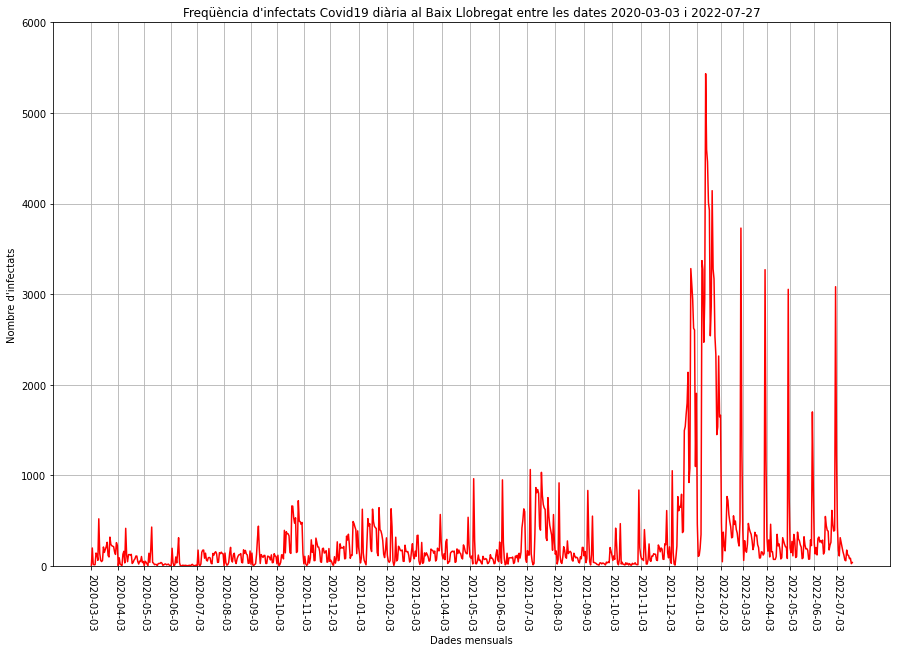

In [95]:
# Comencem a representar gràficament.
plt_1 = plt.figure(figsize=(15, 10))
plt.plot(list(range(len(df_bl))), df_bl.CASOS_CONFIRMAT.tolist(), 'r')

plt.xticks(tick_list, date_list)
plt.xticks(rotation = -90)

plt.xlabel("Dades mensuals")
plt.ylabel("Nombre d'infectats")
plt.title("Freqüència d'infectats Covid19 diària al Baix Llobregat entre les dates 2020-03-03 i 2022-07-27")
plt.grid()

plt.ylim(0,6000)

plt.show()